<a href="https://colab.research.google.com/github/evan-grinalds/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Copy_of_LS_DS17_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,RobustScaler
import scipy
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_validate
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import GridSearchCV
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import matplotlib.style as style

#### Begin to clean and explore your data.


In [6]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/evan-grinalds/Unit-2-Build-Tesla/master/tesla_model_s%20-%20page_1.csv')

print(df.shape)
df

(86, 7)


,Year,Car,Battery (kwh),Ludacris Mode,All-Wheel Drive,Mileage,Price
0,2013,Tesla Model S,60,No,No,82851 mi.,27995
1,2018,Tesla Model S,100,No,Yes,5357 mi.,57992
2,2012,Tesla Model S,60,No,No,85478 mi.,24499
3,2017,Tesla Model S,100,No,Yes,32593 mi.,59980
4,2016,Tesla Model S,60,No,Yes,28418 mi.,49560
...,...,...,...,...,...,...,...
81,2016,Tesla Model S,90,No,Yes,26393 mi.,52999
82,2016,Tesla Model S,70,No,Yes,49306 mi.,38497
83,2018,Tesla Model S,75,No,Yes,23445 mi.,58991
84,2018,Tesla Model S,100,Yes,Yes,8152 mi.,89900


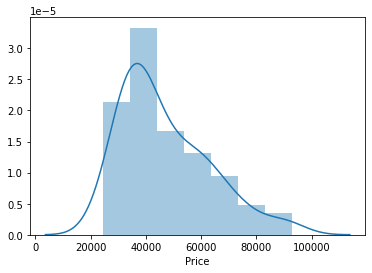

In [8]:
# Creating a visual for 'Price'

sns.distplot(df['Price']);

In [9]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.20)

####  Choose your target. Which column in your tabular dataset will you predict?

In [ ]:
# My target is the price of the Tesla

#### Is your problem regression or classification?

In [ ]:
# I will use regression because my goal is to predict a quantity not a category.

#### How is your target distributed?

In [ ]:
# The target is left-skewed

In [12]:
# Function for ploting Histogram,Q-Q plot and 
# Box plot of target and also print skewness
def target_analysis(target):
    fig = plt.figure(constrained_layout=True, figsize=(14,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(target,norm_hist=True,ax=ax1)
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Q-Q Plot')
    stats.probplot(target,plot=ax2)
    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title('Box Plot')
    sns.boxplot(target,orient='v',ax=ax3)
    print(f'skweness is { target.skew()}')
    plt.show()

skweness is 0.928777926752815


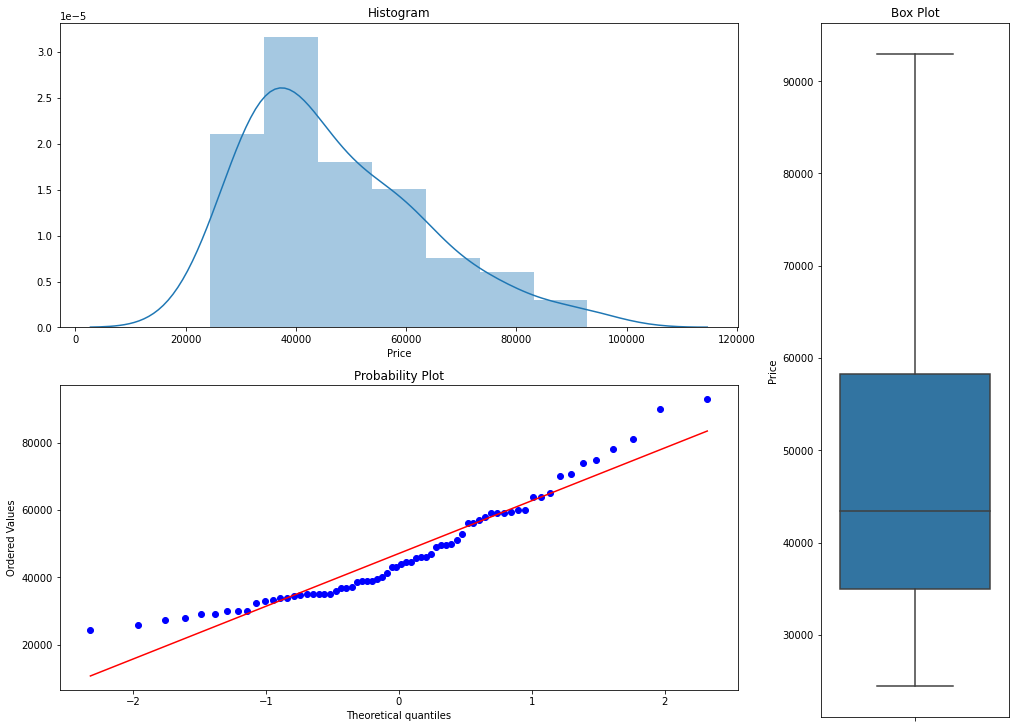

In [13]:
target_analysis(train['Price'])

skweness is 0.32062577156298905


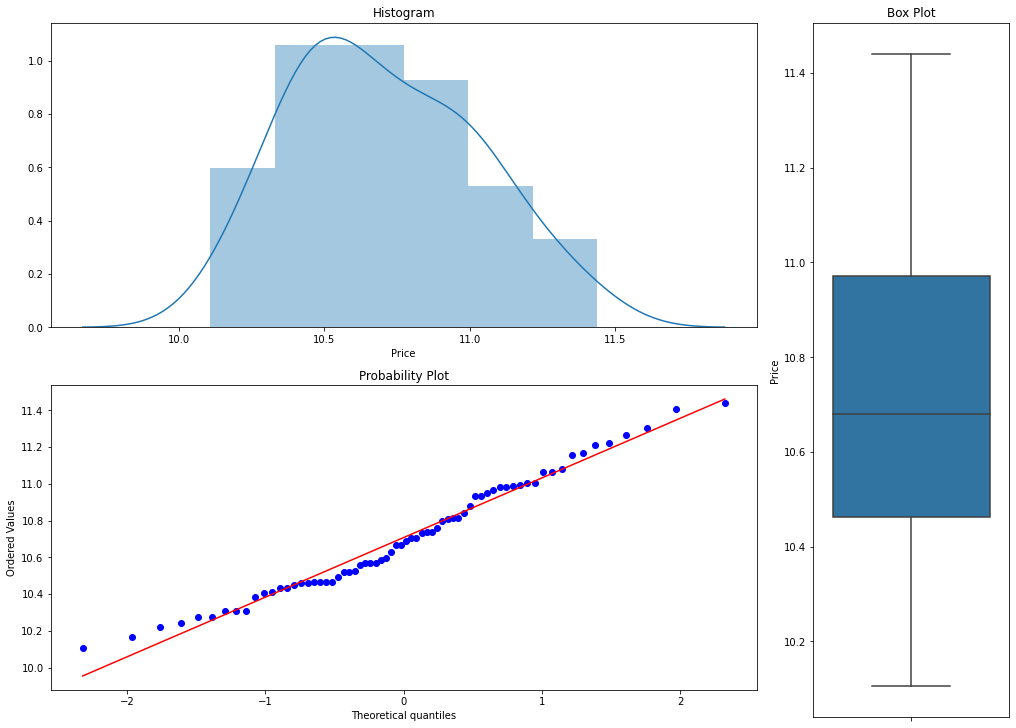

In [14]:
target_analysis(np.log1p(train['Price']))

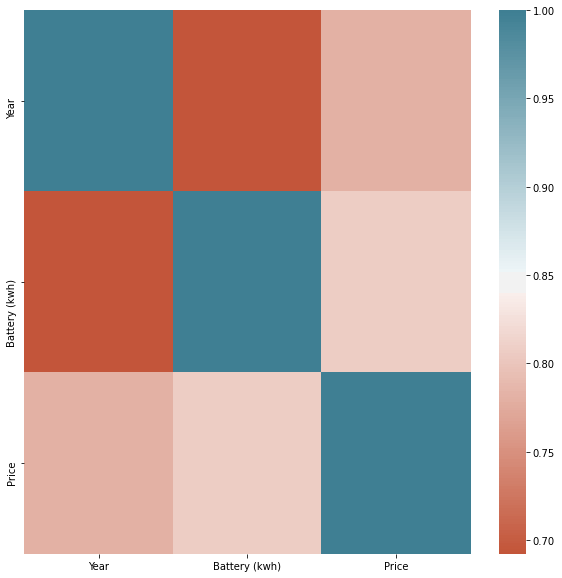

In [15]:
corr = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

#### Choose your evaluation metric(s)

In [ ]:
# Mean absolute error, root mean squared, R^2, Ridge Regression

#### Choose which observations you will use to train, validate, and test your model.

In [ ]:
# I will use the entire data set no outliers. I will do a random split.

####  Begin to clean and explore your data.